<a href="https://colab.research.google.com/github/jini-ninii/ML_labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Найдем все столбцы с типом object и преобразуем их в тип category.

In [33]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    category
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           155 non-null    category
dtypes: category(5), float64(1), int64(7)
memory usage: 26.9 KB


В качестве целевой переменной y выберем Sleep Duration (следствие, которое мы хотим предсказать, используя остальные данные как причины). Все остальные признаки, за исключением Person ID (который является просто идентификатором и не несет полезной информации для модели), станут нашими признаками X.

In [34]:
y = df['Sleep Duration']
X = df.drop(['Sleep Duration', 'Person ID'], axis=1)

In [35]:
y.head(n = 3)

,Sleep Duration
0,6.1
1,6.2
2,6.2


In [36]:
X.head(n = 3)

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,NaN


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

Сначала заполним списки с названиями числовых и категориальных колонок из нашего датафрейма.

In [37]:
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
numeric_features = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

df_eda = X.join(y) # Объединяем X и y для удобства визуализации

Используем boxplot для визуализации распределения Sleep Duration для каждой категории в признаках. Это поможет нам увидеть, есть ли статистически значимые различия в продолжительности сна между группами.

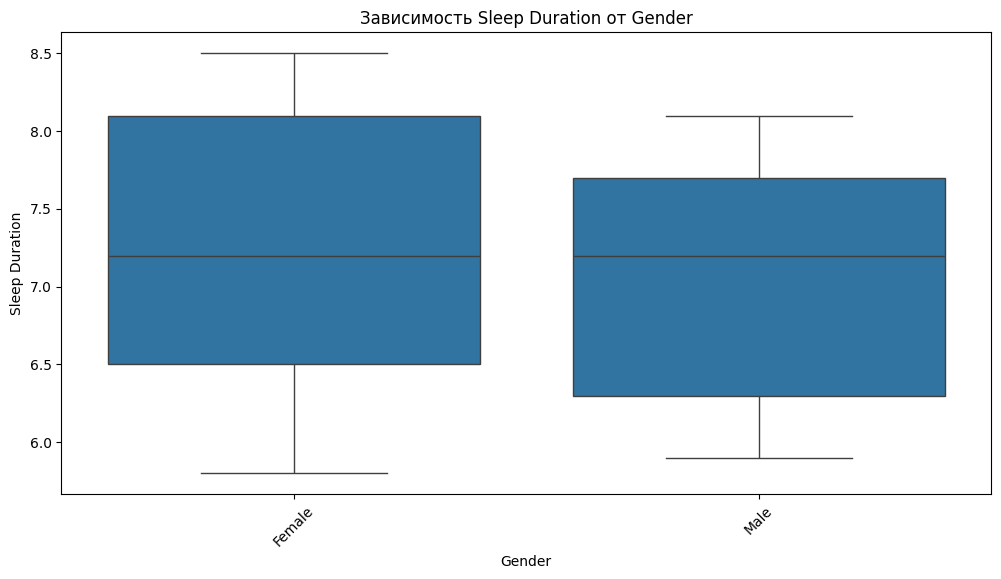

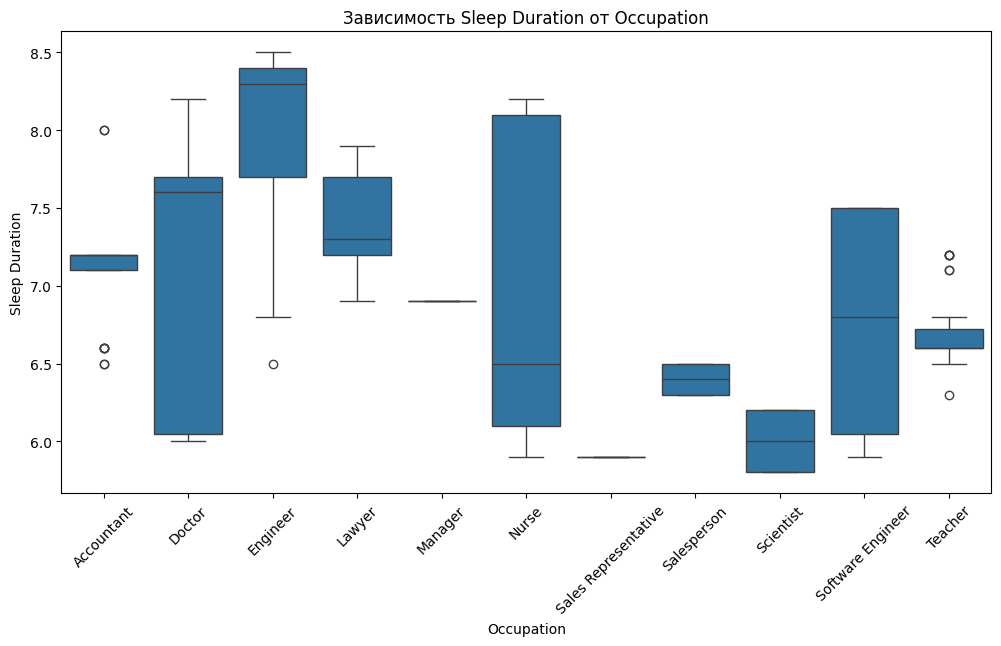

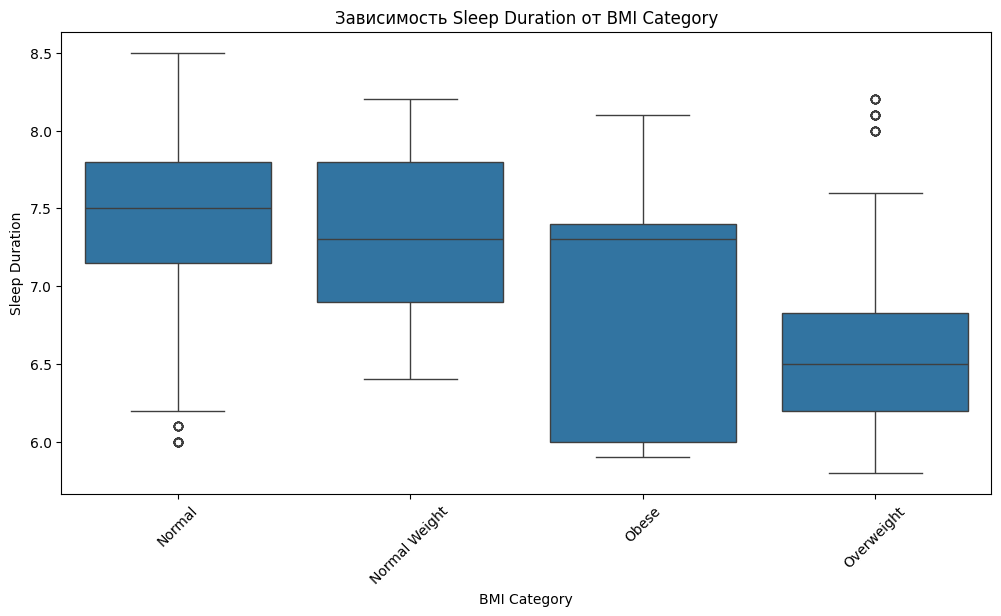

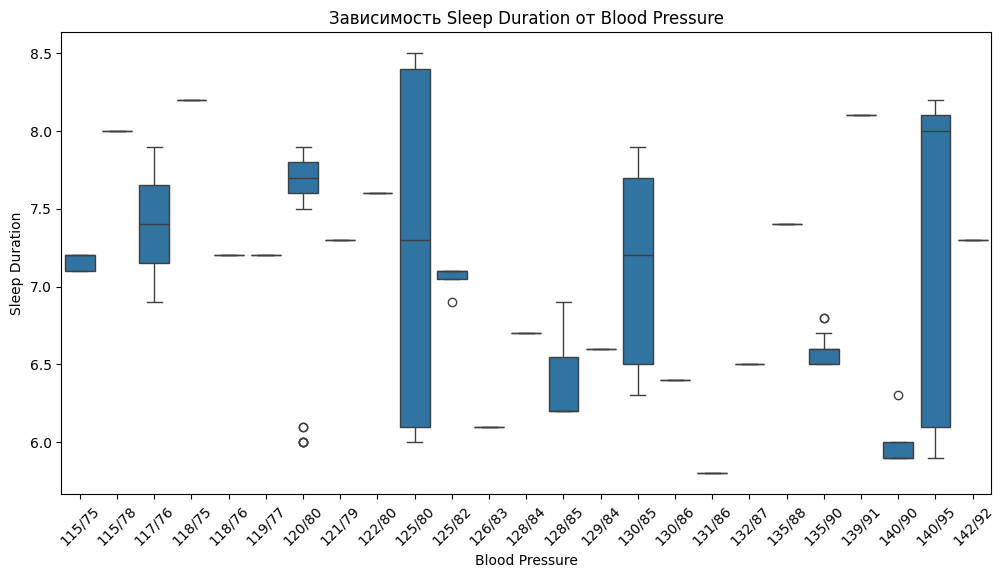

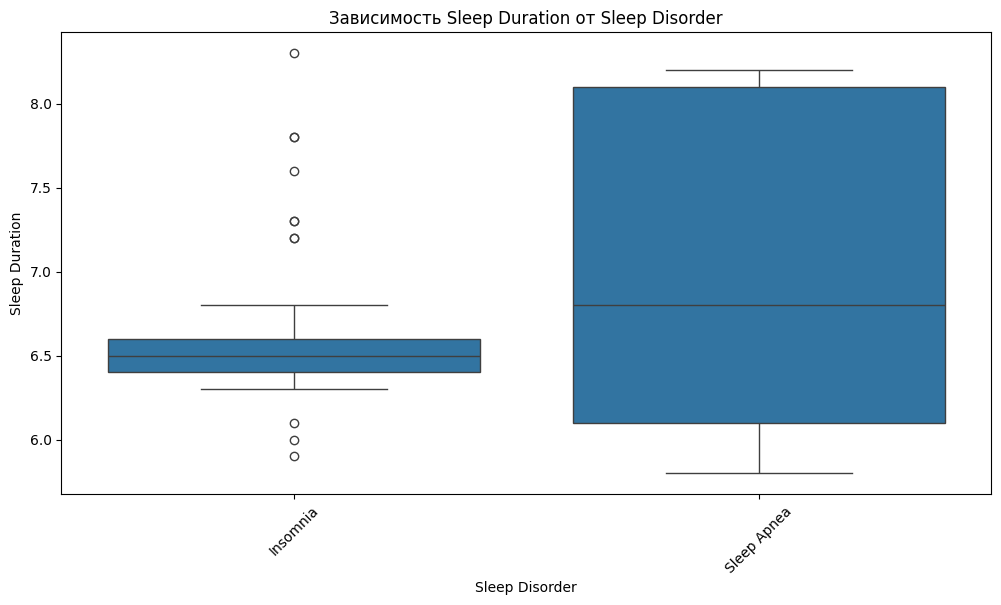

In [38]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Sleep Duration', data=df_eda)
    plt.title(f'Зависимость Sleep Duration от {feature}')
    plt.xticks(rotation=45)
    plt.show()

* Gender - медианная продолжительность сна у женщин незначительно выше, чем у
мужчин, но в целом распределения очень похожи.

* Occupation - профессия заметно влияет на продолжительность сна: у инженеров и медсестер медианные значения одни из самых высоких, а у ученых и торговых представителей - одни из самых низких.

* BMI Category - наблюдается тенденция к снижению продолжительности сна с увеличением индекса массы тела, где категория Overweight имеет самую низкую медиану.

* Blood Pressure - чёткой и легко интерпретируемой зависимости между конкретными значениями артериального давления и продолжительностью сна не прослеживается.

* Sleep Disorder - тип расстройства сна является очень сильным фактором, при этом у людей с Insomnia продолжительность сна заметно ниже.


Теперь построим тепловую карту корреляций, чтобы быстро оценить линейные зависимости между всеми числовыми признаками и целевой переменной. Затем используем scatterplot, чтобы рассмотреть каждую зависимость отдельно.

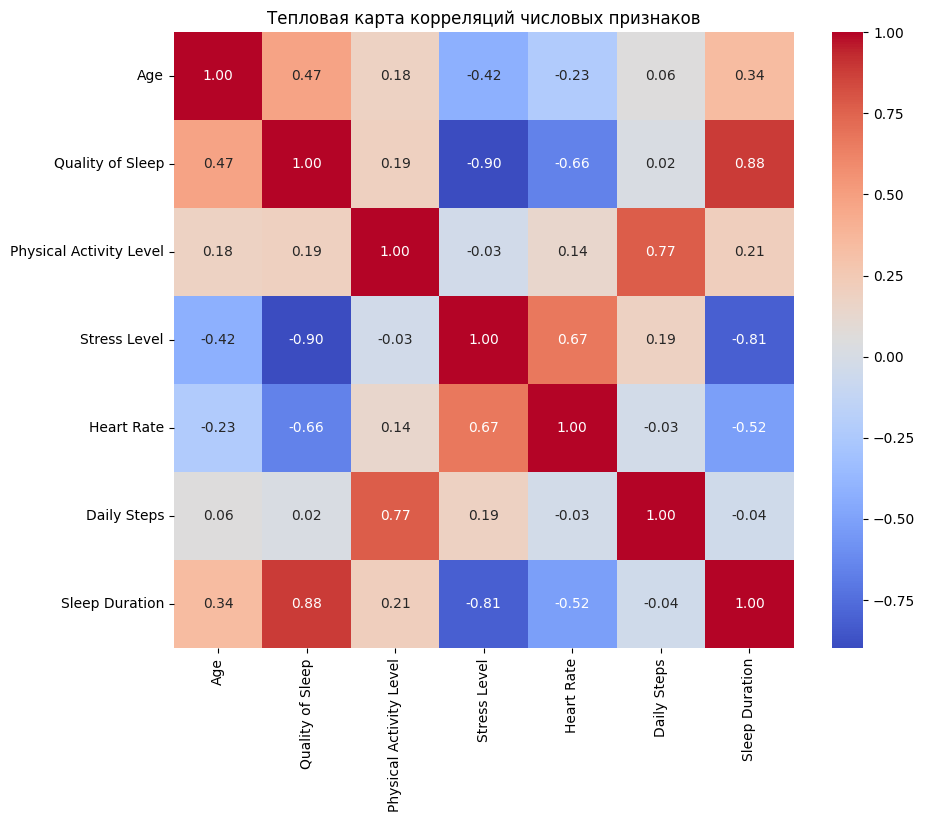

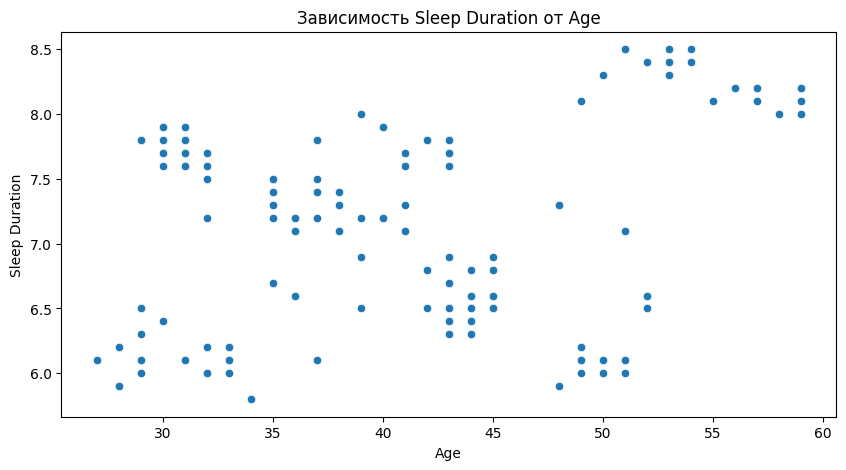

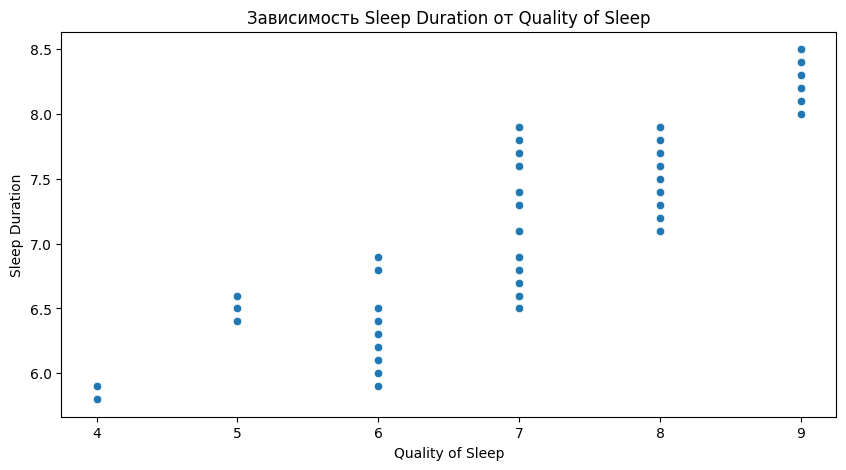

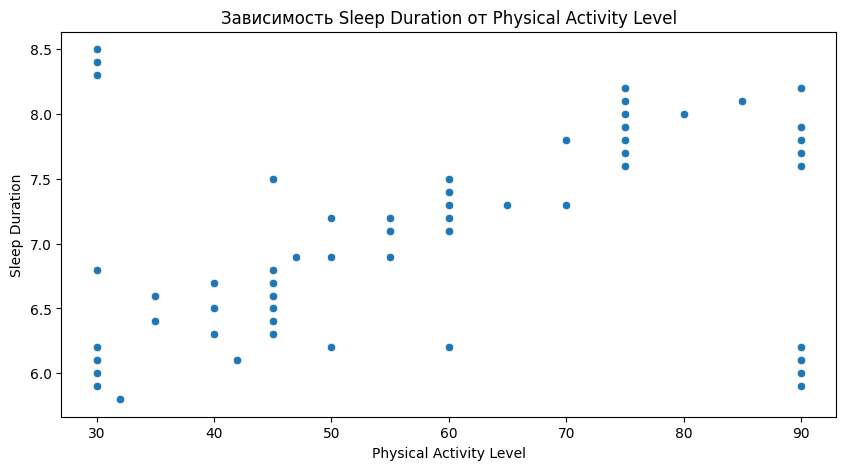

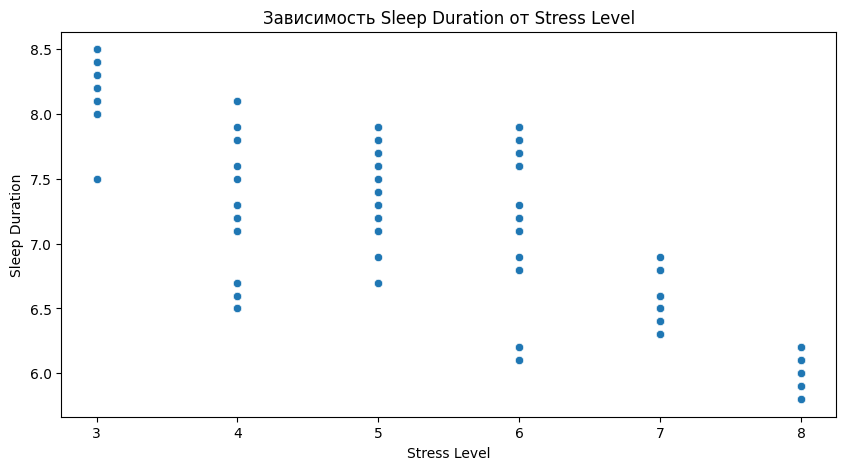

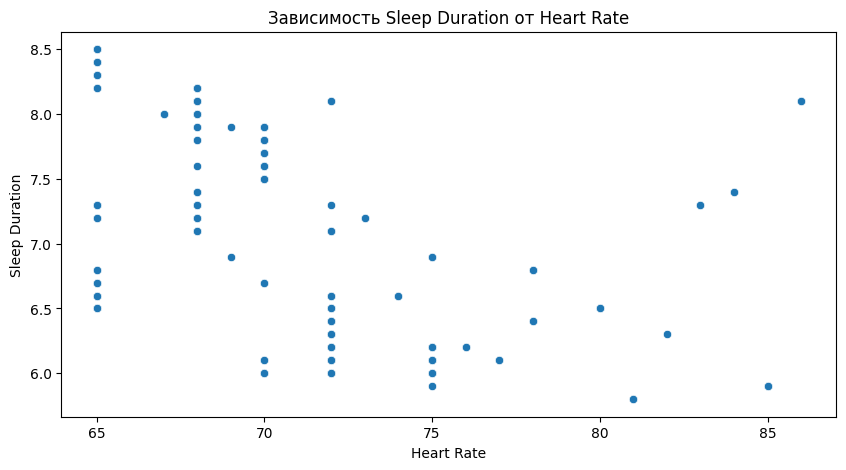

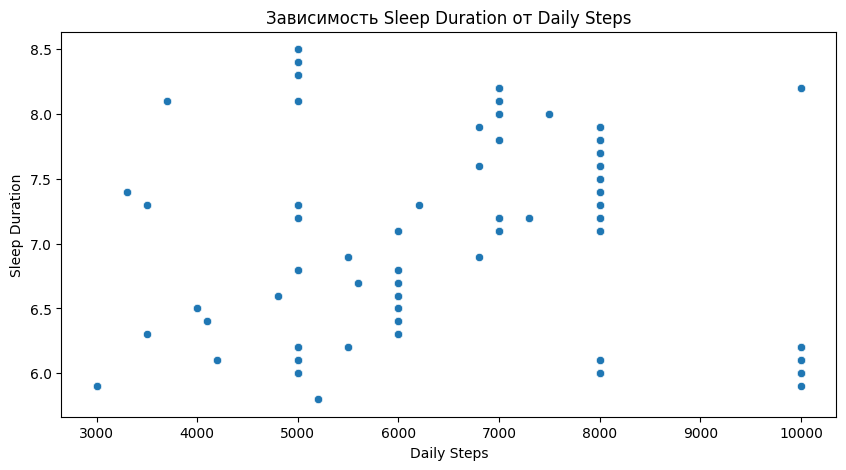

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_eda[numeric_features + ['Sleep Duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций числовых признаков')
plt.show()

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=feature, y='Sleep Duration', data=df_eda)
    plt.title(f'Зависимость Sleep Duration от {feature}')
    plt.show()

* Тепловая карта - Quality of Sleep и Stress Level показывают самые сильные корреляции с целевой переменной Sleep Duration, что делает их ключевыми предикторами.

* Age - наблюдается слабая положительная корреляция с возрастом, однако на графике виден большой разброс данных без четкой линейной зависимости.

* Quality of Sleep - имеет очень сильную положительную линейную связь с продолжительностью сна, что наглядно демонстрирует график.

* Physical Activity Level - имеет слабую положительную корреляцию с продолжительностью сна.

* Stress Level - показывает сильную обратную (отрицательную) корреляцию.

* Heart Rate - имеет умеренную отрицательную корреляцию с продолжительностью сна.

* Daily Steps - практически не имеет линейной корреляции с продолжительностью сна, что подтверждается хаотичным разбросом точек.

Основываясь на анализе, мы включаем в модель все признаки, кроме Sleep Disorder из-за большого количества пропусков. Несмотря на то, что у Daily Steps слабая линейная корреляция, модель может найти в нем нелинейные зависимости, поэтому пока оставим его.

In [40]:
best_features = [f for f in categorical_features + numeric_features if f != 'Sleep Disorder']
best_features

['Gender',
 'Occupation',
 'BMI Category',
 'Blood Pressure',
 'Age',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Метрики MAE, MAPE, R², MSE, RMSE

In [41]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = np.sqrt(MSE)
  print('RMSE=%.3f' % RMSE)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

X_all = X.copy()

X_all['Sleep Disorder'] = X_all['Sleep Disorder'].cat.add_categories('Unknown').fillna('Unknown')

categorical_cols_all = X_all.select_dtypes(include=['category', 'object']).columns
numeric_cols_all = X_all.select_dtypes(include=np.number).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X_all[categorical_cols_all])
X_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols_all), index=X_all.index)
X_encoded


,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,...,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_Unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Преобразование числовых

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_all[numeric_cols_all])
X_scaled = pd.DataFrame(scaled_data, columns=numeric_cols_all, index=X_all.index)
X_scaled

,Age,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584
1,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077
2,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077
3,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273
4,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273
...,...,...,...,...,...,...
369,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356
370,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356
371,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356
372,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356


### Разделение на обучающую, тестовую

Объединяем в итоговый датафрейм X_prepared_all

In [44]:
X_prepared_all = pd.concat([X_scaled, X_encoded], axis=1)
X_prepared_all

,Age,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,...,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_Unknown
0,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
370,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
371,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
372,1.941401,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared_all, y, test_size=0.2, random_state=42)

### Модели

Модель 1:

In [46]:
model1 = LinearRegression()

model1.fit(X_prepared_all, y)

y_pred1 = model1.predict(X_prepared_all)

calculate_metrics(y, y_pred1)

MAE 0.072
MAPE=0.010, MAPE_as_percent=1.031%
R2=0.983
MSE=0.011
RMSE=0.103


Модель объясняет 98.3% вариативности (разброса данных) в продолжительности сна. В среднем предсказание модели отличается от реальной продолжительности сна всего на 0.0722 часа, что составляет примерно 4 минуты. Средняя ошибка предсказания составляет всего 1.03% от фактического значения. Это также указывает на очень высокую точность.

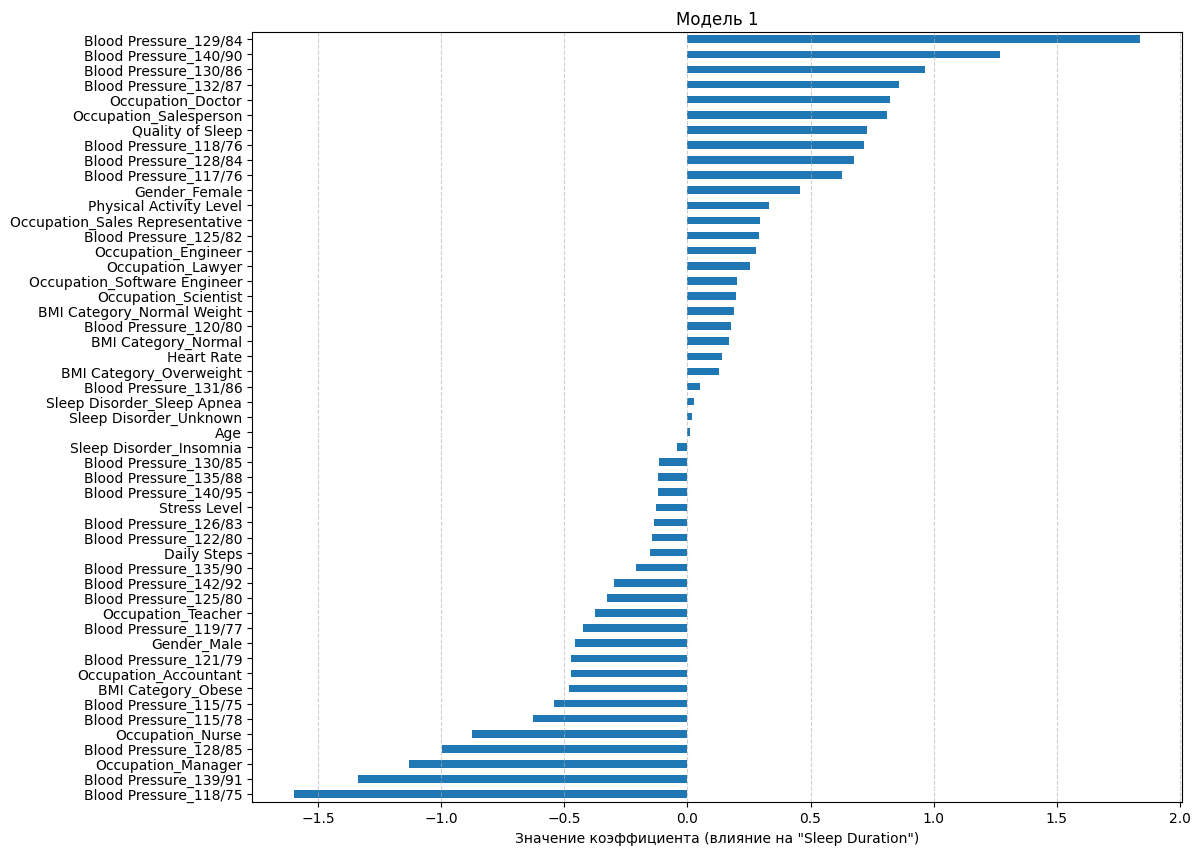

In [47]:
coefs = pd.Series(model1.coef_, index=X_prepared_all.columns)
sorted_coefs = coefs.sort_values()

plt.figure(figsize=(12, 10))
sorted_coefs.plot(kind='barh')
plt.title('Модель 1')
plt.xlabel('Значение коэффициента (влияние на "Sleep Duration")')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Модель обнаружила, что определенные категории кровяного давления и профессии являются самыми сильными предикторами для определения продолжительности сна. Признаки, которые мы считали важными на этапе EDA (Quality of Sleep и Stress Level), также показывают логичное влияние (положительное и отрицательное соответственно), но их вклад оказывается меньше, чем у некоторых категориальных признаков.

Модель 2:

In [48]:
model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)

y_pred_test = model2.predict(X_test)

print("Оценка на ОБУЧАЮЩЕЙ выборке")
calculate_metrics(y_train, y_pred_train)

print("\nОценка на ТЕСТОВОЙ выборке")
calculate_metrics(y_test, y_pred_test)

Оценка на ОБУЧАЮЩЕЙ выборке
MAE 0.064
MAPE=0.009, MAPE_as_percent=0.908%
R2=0.987
MSE=0.008
RMSE=0.091

Оценка на ТЕСТОВОЙ выборке
MAE 0.099
MAPE=0.014, MAPE_as_percent=1.419%
R2=0.961
MSE=0.026
RMSE=0.162


Качество на тестовой выборке немного ниже, чем на обучающей. Например, R² снизился с 0.9865 до 0.9600, а MAE выросла с 0.0637 до 0.0980.



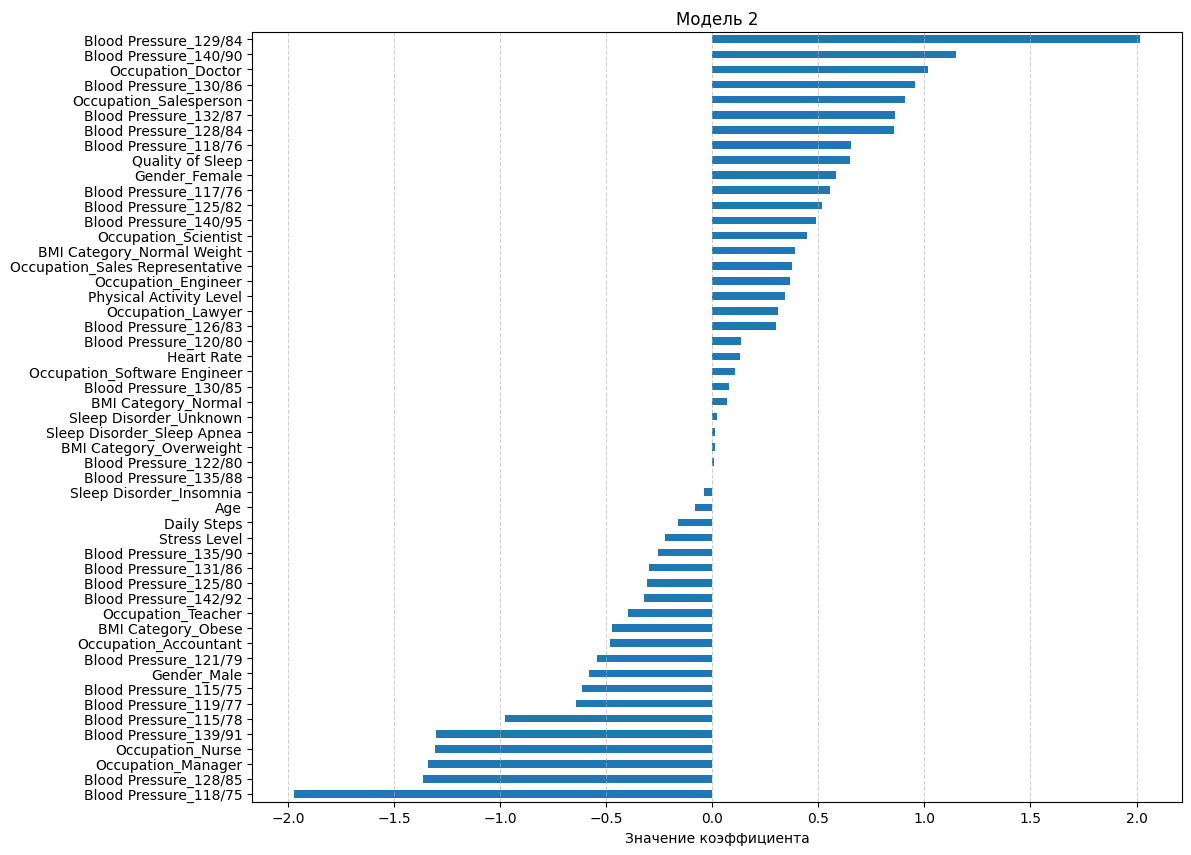

In [49]:
coefs2 = pd.Series(model2.coef_, index=X_prepared_all.columns)
sorted_coefs2 = coefs2.sort_values()

plt.figure(figsize=(12, 10))
sorted_coefs2.plot(kind='barh')
plt.title('Модель 2')
plt.xlabel('Значение коэффициента')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Модель 2 научилась очень точно определять продолжительность сна, в значительной степени полагаясь на конкретные категории профессий и кровяного давления. Признаки, которые мы считали ключевыми на этапе разведочного анализа (Quality of Sleep и Stress Level), также важны, но их влияние в итоговой модели оказалось сопоставимо или даже меньше, чем у некоторых категориальных признаков.

Модель 3:

Создадим новый подготовленный датафрейм X_prepared_best, используя только признаки из списка best_features.

In [50]:
X_best = X[best_features].copy()
categorical_cols_best = X_best.select_dtypes(include=['category', 'object']).columns
numeric_cols_best = X_best.select_dtypes(include=np.number).columns

encoder_best = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_best = encoder_best.fit_transform(X_best[categorical_cols_best])
encoded_df_best = pd.DataFrame(encoded_data_best, columns=encoder_best.get_feature_names_out(categorical_cols_best), index=X_best.index)

scaler_best = StandardScaler()
scaled_data_best = scaler_best.fit_transform(X_best[numeric_cols_best])
scaled_df_best = pd.DataFrame(scaled_data_best, columns=numeric_cols_best, index=X_best.index)

X_prepared_best = pd.concat([scaled_df_best, encoded_df_best], axis=1)

Теперь обучим модель на X_prepared_best и оценим ее на этих же данных.

In [51]:
model3 = LinearRegression()

model3.fit(X_prepared_best, y)

y_pred3 = model3.predict(X_prepared_best)

calculate_metrics(y, y_pred3)

MAE 0.072
MAPE=0.010, MAPE_as_percent=1.029%
R2=0.983
MSE=0.011
RMSE=0.104


Качество Модели 3 незначительно ниже, чем у Модели 1. Мы убрали Sleep Disorder, и качество немного упало.

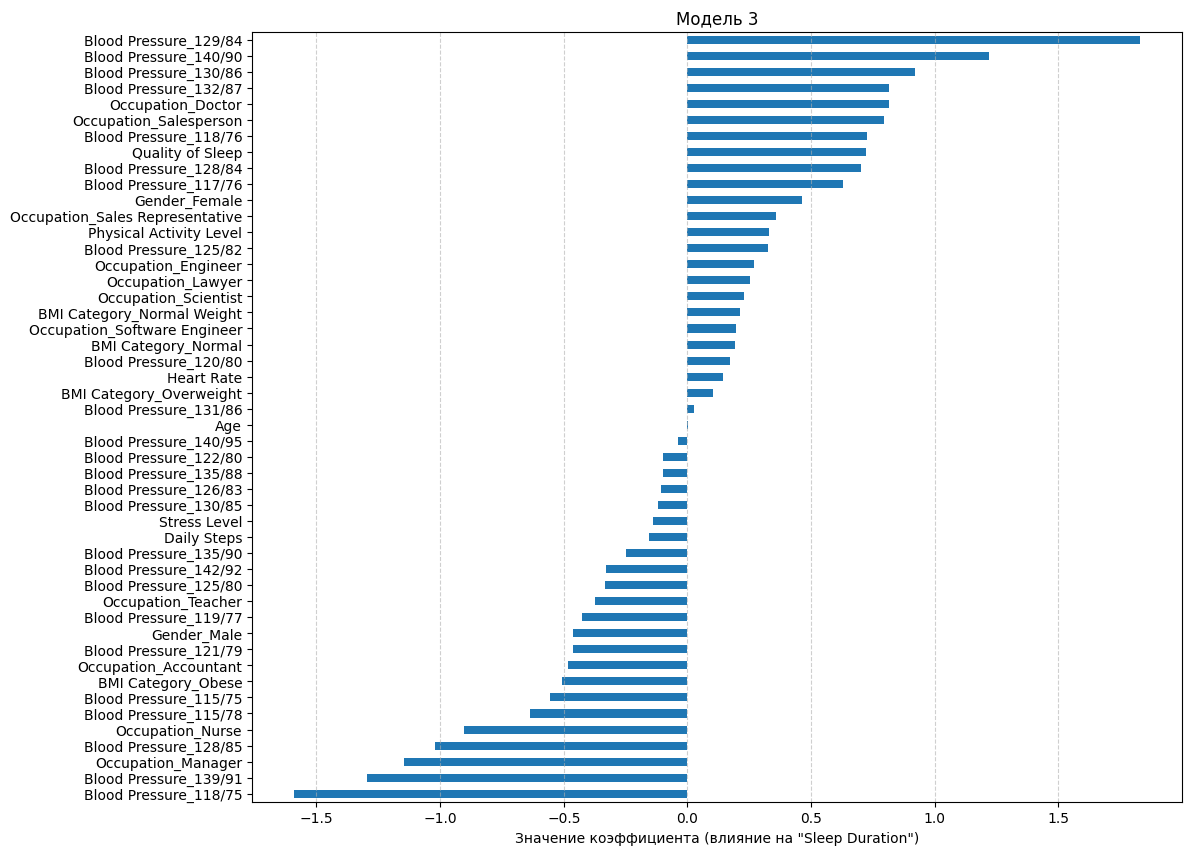

In [52]:
coefs3 = pd.Series(model3.coef_, index=X_prepared_best.columns)
sorted_coefs3 = coefs3.sort_values()

plt.figure(figsize=(12, 10))
sorted_coefs3.plot(kind='barh')
plt.title('Модель 3')
plt.xlabel('Значение коэффициента (влияние на "Sleep Duration")')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Этот график показывает, какие факторы модель, обученная без признака Sleep Disorder, считает наиболее важными для предсказания. Даже после удаления Sleep Disorder, модель находит очень сильные зависимости в данных и для точного прогноза сильно полагается на конкретные категории профессий и кровяного давления. Влияние таких признаков, как Stress Level и Daily Steps, в этой многофакторной модели оказалось относительно небольшим по сравнению с лидерами.

Модель 4:

Разделяем датасет с лучшими признаками на обучающую и тестовую выборки

In [53]:
X_train_best, X_test_best, y_train, y_test = train_test_split(X_prepared_best, y, test_size=0.2, random_state=42)

In [54]:
model4 = LinearRegression()

model4.fit(X_train_best, y_train)

y_pred_train4 = model4.predict(X_train_best)
y_pred_test4 = model4.predict(X_test_best)

print("Оценка на ОБУЧАЮЩЕЙ выборке")
calculate_metrics(y_train, y_pred_train4)

print("\nОценка на ТЕСТОВОЙ выборке")
calculate_metrics(y_test, y_pred_test4)

Оценка на ОБУЧАЮЩЕЙ выборке
MAE 0.064
MAPE=0.009, MAPE_as_percent=0.901%
R2=0.986
MSE=0.008
RMSE=0.092

Оценка на ТЕСТОВОЙ выборке
MAE 0.098
MAPE=0.014, MAPE_as_percent=1.411%
R2=0.960
MSE=0.027
RMSE=0.163


Качество Модели 4 на тесте лишь незначительно уступает качеству Модели 2 (которая использовала Sleep Disorder и имела чуть более высокий R²). Это показывает, что мы можем пожертвовать минимальной долей точности, чтобы получить более робастную модель, которая не зависит от признака с огромным количеством пропусков.

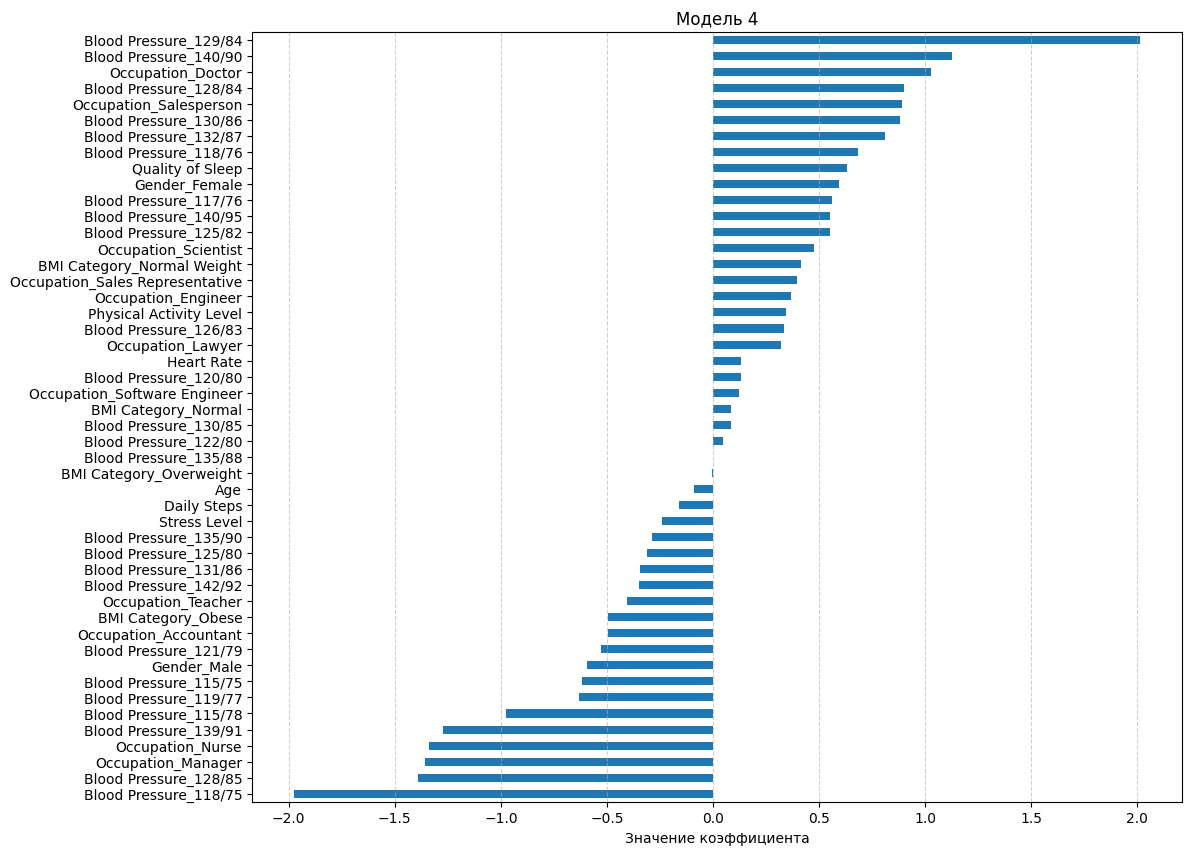

In [55]:
coefs4 = pd.Series(model4.coef_, index=X_prepared_best.columns)
sorted_coefs4 = coefs4.sort_values()

plt.figure(figsize=(12, 10))
sorted_coefs4.plot(kind='barh')
plt.title('Модель 4')
plt.xlabel('Значение коэффициента')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Модель научилась делать очень точные прогнозы, опираясь в первую очередь на конкретные категории кровяного давления и профессий. Важно, что эти закономерности были выучены на обучающей выборке и успешно подтвердили свою работоспособность на тестовых данных, что говорит о их надежности.